## Caricamento delle Librerie e dei Dati

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.regime_switching.markov_switching import MarkovSwitching
from sklearn.preprocessing import StandardScaler

In [2]:
df_NonNormalizzato = pd.read_csv("TabelloneNonNormalizzato.csv")

## Aggiungo le derivate

In [3]:
tmp = pd.DataFrame(df_NonNormalizzato['Date'])
tmp['DerivataGDP'] = df_NonNormalizzato['GDP'].diff()
diff_values = df_NonNormalizzato['GDP'].diff()
# Creare una nuova colonna con la derivata desiderata
tmp['derivata_desiderata'] = np.nan
# Inizializzare il primo valore
tmp.loc[0, 'derivata_desiderata'] = np.nan
# Calcolare la derivata desiderata
for i in range(1, len(tmp)):
    if diff_values[i] != 0:
        tmp.loc[i, 'DerivataGDP'] = diff_values[i]
    else:
        tmp.loc[i, 'DerivataGDP'] = tmp.loc[i - 1, 'DerivataGDP']
df_NonNormalizzato['D_GDP'] = tmp['DerivataGDP']
df_NonNormalizzato = df_NonNormalizzato.dropna()

In [4]:
df_NonNormalizzato.head()

,Date,GAS,Vol.GAS,PETROLIO,RAME,Vol.RAME,ORO,Vol.ORO,NASDAQ,Vol.NASDAQ,...,NondurableGoods,NonResidentials,PersonalConsumptionExpenditures,Residential,Services,StateAndLocal,Structures,UR,CCI,D_GDP
63,1990-07-02,1.519,60.0,16.72,1.1290,3510.0,362.9,10.0,462.000000,114150000.0,...,78.649,25.361,163.543,12.466,63.124,14.324,8.28,5.5,99.84465,3.617
64,1990-07-03,1.525,90.0,16.80,1.1310,3080.0,366.1,0.0,461.799988,131020000.0,...,78.649,25.361,163.543,12.466,63.124,14.324,8.28,5.5,99.84465,3.617
65,1990-07-04,1.525,90.0,16.80,1.1310,3080.0,366.1,0.0,461.799988,131020000.0,...,78.649,25.361,163.543,12.466,63.124,14.324,8.28,5.5,99.84465,3.617
66,1990-07-05,1.514,80.0,16.50,1.1605,5860.0,365.2,0.0,459.200012,97760000.0,...,78.649,25.361,163.543,12.466,63.124,14.324,8.28,5.5,99.84465,3.617
67,1990-07-06,1.498,110.0,16.47,1.1820,5260.0,364.8,0.0,460.500000,101400000.0,...,78.649,25.361,163.543,12.466,63.124,14.324,8.28,5.5,99.84465,3.617


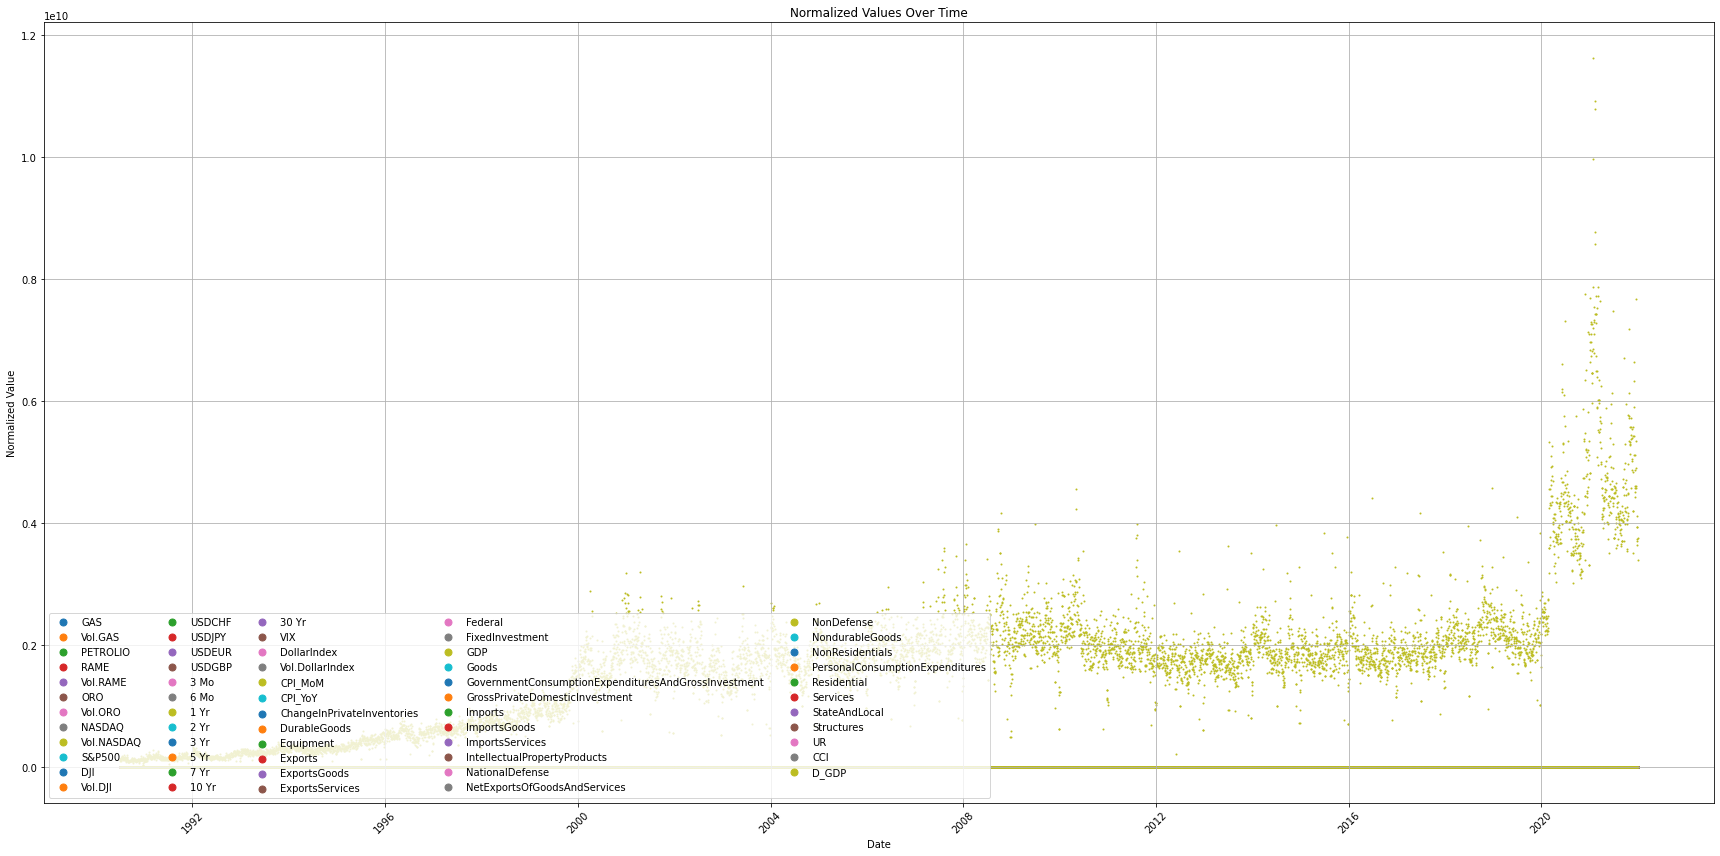

In [5]:
# Creiamo un grafico vuoto
plt.figure(figsize=(24, 12))
df_NonNormalizzato['Date'] = pd.to_datetime(df_NonNormalizzato['Date'], format='%Y/%m/%d')
# Iteriamo sulle colonne del DataFrame normalizzato
for col in df_NonNormalizzato.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df_NonNormalizzato['Date'], df_NonNormalizzato[col], label=col, s=1)

# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Normalized Values Over Time')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
plt.grid(True) 

plt.show()

## Normalizzo

### Normalizzo tutto insieme

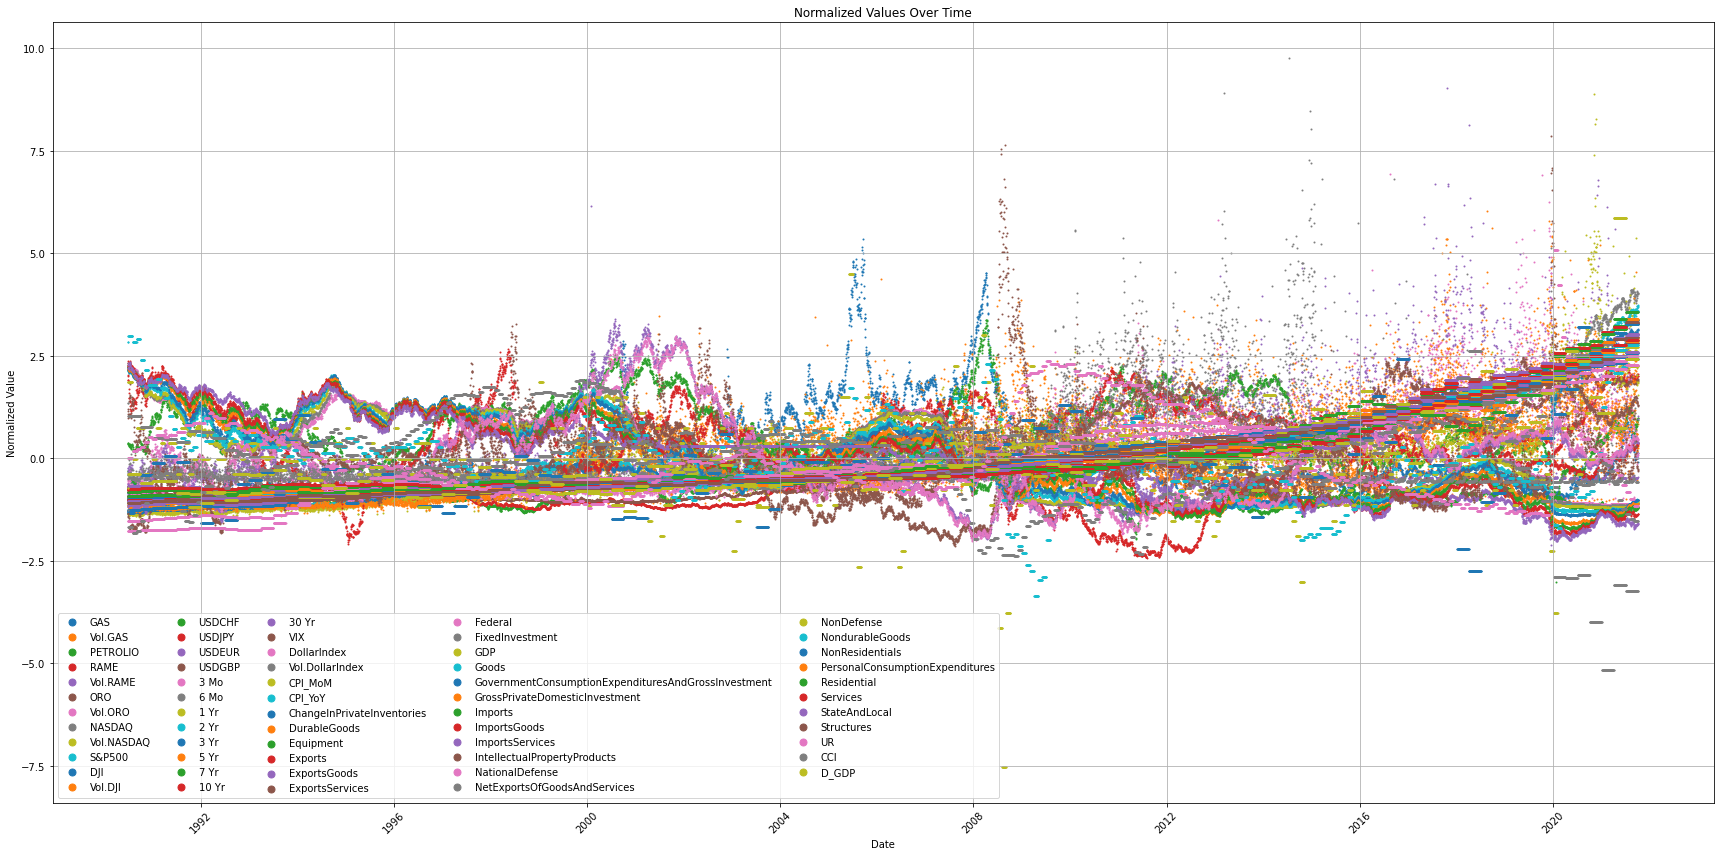

           GAS   Vol.GAS  PETROLIO      RAME  Vol.RAME       ORO   Vol.ORO  \
0    -1.018096 -1.089250 -1.113051 -0.806848 -0.351345 -0.868782 -0.962122   
1    -1.015345 -1.088785 -1.110264 -0.805128 -0.369133 -0.862663 -0.962219   
2    -1.015345 -1.088785 -1.110264 -0.805128 -0.369133 -0.862663 -0.962219   
3    -1.020389 -1.088940 -1.120716 -0.779755 -0.254130 -0.864384 -0.962219   
4    -1.027727 -1.088475 -1.121761 -0.761263 -0.278951 -0.865149 -0.962219   
...        ...       ...       ...       ...       ...       ...       ...   
8241  0.147202 -0.486782  0.937292  2.066272 -0.489927  1.896227 -0.147035   
8242  0.144909 -0.537491  0.951576  2.031869 -0.483722  1.900243  0.010815   
8243  0.130692 -1.015434  0.971783  2.015097 -0.463038  1.890490  0.380033   
8244 -0.081639  0.843146  0.986765  2.000045  0.957123  1.906363  0.135565   
8245 -0.004136  0.353572  0.924749  2.061112  1.033240  1.934091  0.069464   

        NASDAQ  Vol.NASDAQ    S&P500  ...  NonResidentials  \
0

In [6]:
# Seleziona le colonne da normalizzare
columns_to_normalize = df_NonNormalizzato.columns[1:]

# Crea un nuovo DataFrame con solo le colonne da normalizzare
df = df_NonNormalizzato[columns_to_normalize]

# Inizializza lo StandardScaler
scaler = StandardScaler()

# Normalizza i dati
df = pd.DataFrame(scaler.fit_transform(df), columns=columns_to_normalize)
# Sostituisci le colonne nel DataFrame originale con quelle normalizzate

df['Date'] = df_NonNormalizzato['Date']

# Creiamo un grafico vuoto
plt.figure(figsize=(24, 12))
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')
# Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)

# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Normalized Values Over Time')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
plt.grid(True) 

plt.show()
print(df)

### Normalizzo una colonna per volta

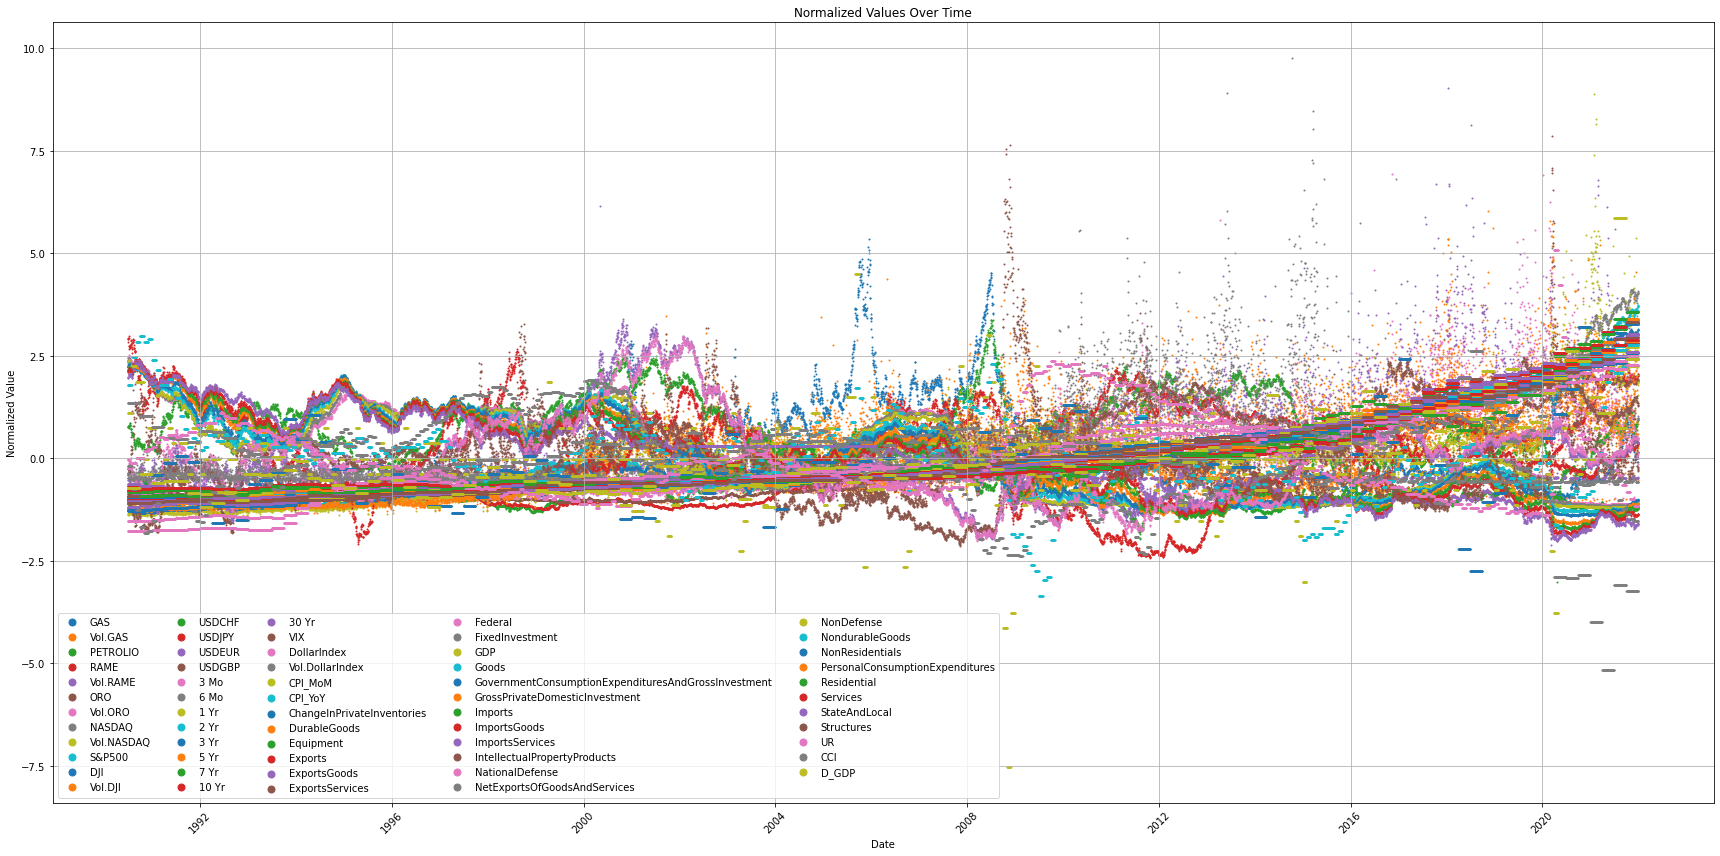

           Date       GAS   Vol.GAS  PETROLIO      RAME  Vol.RAME       ORO  \
63   1990-07-02 -1.018096 -1.089250 -1.113051 -0.806848 -0.351345 -0.868782   
64   1990-07-03 -1.015345 -1.088785 -1.110264 -0.805128 -0.369133 -0.862663   
65   1990-07-04 -1.015345 -1.088785 -1.110264 -0.805128 -0.369133 -0.862663   
66   1990-07-05 -1.020389 -1.088940 -1.120716 -0.779755 -0.254130 -0.864384   
67   1990-07-06 -1.027727 -1.088475 -1.121761 -0.761263 -0.278951 -0.865149   
...         ...       ...       ...       ...       ...       ...       ...   
8304 2021-12-27  0.147202 -0.486782  0.937292  2.066272 -0.489927  1.896227   
8305 2021-12-28  0.144909 -0.537491  0.951576  2.031869 -0.483722  1.900243   
8306 2021-12-29  0.130692 -1.015434  0.971783  2.015097 -0.463038  1.890490   
8307 2021-12-30 -0.081639  0.843146  0.986765  2.000045  0.957123  1.906363   
8308 2021-12-31 -0.004136  0.353572  0.924749  2.061112  1.033240  1.934091   

       Vol.ORO    NASDAQ  Vol.NASDAQ  ...  Nondurab

In [7]:
df = pd.DataFrame()
df['Date'] = df_NonNormalizzato['Date']
# Inizializza lo StandardScaler per la z-score normalization
scaler = StandardScaler()

# Itera sulle colonne del DataFrame e normalizza ciascuna colonna
for col in df_NonNormalizzato.columns[1:]:
    df[col] = scaler.fit_transform(df_NonNormalizzato[col].values.reshape(-1, 1))
    
# Creiamo un grafico vuoto
plt.figure(figsize=(24, 12))
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')
# Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)

# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Normalized Values Over Time')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
plt.grid(True) 

plt.show()
print(df)

## Time Series

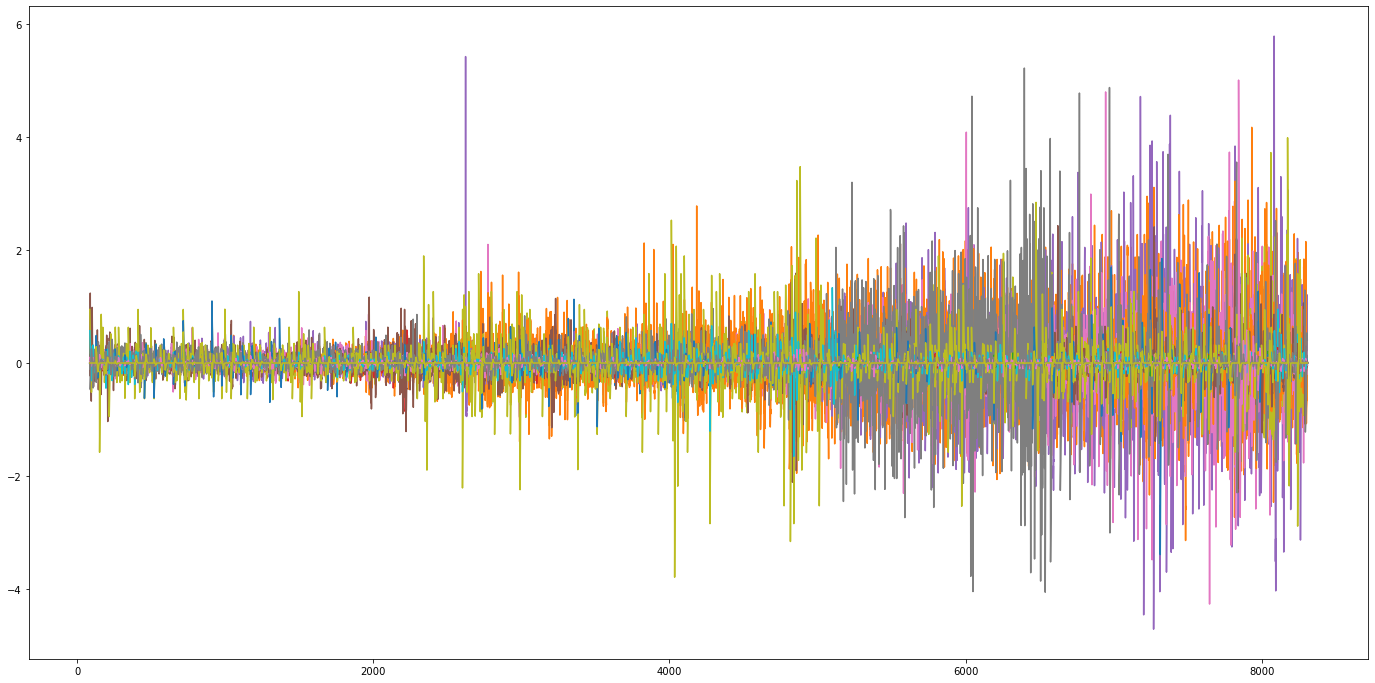

,Date,GAS,Vol.GAS,PETROLIO,RAME,Vol.RAME,ORO,Vol.ORO,NASDAQ,Vol.NASDAQ,...,NondurableGoods,NonResidentials,PersonalConsumptionExpenditures,Residential,Services,StateAndLocal,Structures,UR,CCI,D_GDP
85,1990-08-01,-0.000439,-0.000864,0.007967,0.032842,-0.121260,0.007041,0.005193,-0.000522,-0.018561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.097257,-0.458106,-1.110223e-16
86,1990-08-02,0.012990,0.002533,0.045493,0.026854,-0.089846,0.009571,0.037845,-0.001375,0.001255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079574,-0.374814,1.110223e-16
87,1990-08-03,0.041965,0.003137,0.068800,-0.004065,-0.075476,0.006285,0.005443,-0.003338,0.046179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062695,-0.295308,1.110223e-16
88,1990-08-06,0.065306,0.001119,0.151603,-0.001469,-0.050492,0.014260,-0.003998,-0.006602,0.022666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046619,-0.219588,-1.110223e-16
89,1990-08-07,0.009481,-0.000944,0.122949,0.000418,-0.027685,0.008575,0.057680,-0.003864,0.015989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031347,-0.147654,-1.110223e-16


In [13]:
plt.figure(figsize=(24, 12))
for col in df.columns:
    if(col != 'Date'):  
        ts = pd.Series(df[col])
        df[col] = ts - ts.rolling(window=12).mean()
        plt.plot(df[col])
plt.show()
df = df.dropna()
df.head()

In [9]:
np.linspace(-40, 40, 10 + 1)

array([-40., -32., -24., -16.,  -8.,   0.,   8.,  16.,  24.,  32.,  40.])

In [10]:
n_reg = 100
for elem in np.digitize(list(range(40)), np.linspace(-40, 40, n_reg + 1)[1:-1]):
    print(elem)

50
51
52
53
55
56
57
58
60
61
62
63
65
66
67
68
70
71
72
73
75
76
77
78
80
81
82
83
85
86
87
88
90
91
92
93
95
96
97
98


In [11]:
sax = np.digitize(df_NonNormalizzato['ORO'].diff(), np.linspace(-10, 10, 10 + 1)[1:-1])

tmp = pd.DataFrame()
tmp['Date'] = df['Date']
tmp['sax'] = sax

d = {}

for reg in set(sax):
    d[reg] = 0
    
conta = 0
for i, elem in tmp.iterrows():
    d[elem['sax']] += 1

for k, v in d.items():
    print(k, '--->', d[k])

0 ---> 848
1 ---> 246
2 ---> 378
3 ---> 737
4 ---> 1622
5 ---> 1854
6 ---> 799
7 ---> 465
8 ---> 290
9 ---> 1007


In [12]:
for i, elem in tmp.iterrows():
    print(elem['sax'], df['GAS'].diff()[i])

9 nan
6 nan
5 nan
4 nan
4 nan
3 nan
3 nan
4 nan
6 nan
8 nan
4 nan
4 nan
4 -0.0028662380698367684
4 0.0007643301519566492
4 -0.004929929480119499
8 0.017656026510194822
4 -0.006955404382803954
7 0.0020254749026846763
3 0.0001910825379891623
4 0.00416559932816285
6 -0.0013757942735217465
6 -0.005312094556097602
6 -0.0005732476139672649
6 0.014904437963151551
5 0.03347766065569435
8 0.030305690525075146
5 -0.052853430007791635
4 -0.001490443796315244
6 -0.0034394856838042553
9 0.007261136443587057
9 -0.012611447507282492
4 -0.008140116118336538
3 -0.00909552880828235
8 0.00019108253798894026
5 0.0031337536230218177
5 -0.009974508483032496
3 0.004815279957326224
6 0.009783425945043112
5 0.05105725415069373
6 -0.011082787203369193
0 -0.011770684340129955
3 -0.0012993612583258596
5 0.0007643301519564272
7 0.011273869741358133
1 -0.01971971792047733
5 -0.002675155531847828
5 0.001910825379891179
6 -0.0018726088722935685
6 0.0031337536230220397
4 -0.012305715446500054
0 0.007643301519564938
5 

4 0.0201400995040536
5 -0.015324819546727708
3 0.013222911628847145
5 0.01467513891756489
5 -0.024649647400597052
2 -0.02193627536115128
5 -0.0037834342521845254
3 -0.008484064686717141
4 0.00783438405755399
5 0.0024458564862609444
5 0.011121003710966915
3 -0.005808909154869535
0 -0.007146486920793005
2 -0.02717193690205344
5 -0.007796167549956268
6 -0.025605060090542642
4 0.040700580591683466
6 -0.003401269176206312
4 0.003821650759782247
4 0.004012733297771742
7 0.0567897302903676
4 -0.02812734959199903
3 -0.01994901696606466
5 0.027592318485629486
6 0.07062410604078018
6 -0.011273869741358356
4 -0.023732451218249073
3 -0.02480251343098827
6 0.025834359136129303
5 -0.00447133138894551
5 -0.01154138529454296
5 -0.0544967398344981
4 0.012955396075662762
5 0.014407623364379729
4 -0.000993629197543311
7 0.007337569458782278
4 0.022585955990314543
6 0.005464960586489043
4 -0.02315920360428203
6 0.03389804223927051
3 0.04459866436666138
5 0.06989799239642158
4 0.02170697631556434
5 -0.1439

4 -0.023159203604281586
5 0.0006878971367607623
6 0.050292923998737415
4 -0.010891704665380031
6 -0.015783417637901698
5 -0.025413977552553257
5 0.0006114641215649863
6 -0.02560506009054242
5 0.02143946076237957
3 0.061337494694508776
4 -0.0021401244254783958
3 0.02331206963467336
4 -0.006917187875206565
6 0.0186878722153363
4 0.002560506009054331
6 -0.024267482324618617
4 0.02575792612093386
6 0.02831843212998808
5 -0.03152861876820534
4 -0.042611405971574645
2 -0.01184711735532562
1 0.017044562388629947
4 0.06129927818691072
5 -0.10616545810675704
6 0.04410184976788967
1 0.01903182078371668
5 0.0397833844093356
7 -0.001834392364695736
6 0.024802513430988382
5 -0.033363011132900966
6 -0.09512088741098568
4 -0.010891704665380031
1 -0.013796159242814854
6 0.025299328029760093
5 -0.020025449981260213
4 0.0024458564862607224
4 -0.008140116118336649
6 -0.04138847772844423
4 0.010968137680575807
4 0.05017827447594403
4 0.02805091657680303
3 0.021515893777575568
5 -0.001337577765923914
3 -0.

3 0.0014522272887171894
5 0.017082778896227557
5 0.005350311063695545
5 0.005273878048499769
5 0.018764305230532075
4 0.008101899610738816
4 0.0011464952279347518
5 0.0006496806291630408
4 0.002904454577434712
4 -0.013146478613651813
5 -0.006993620890401897
4 -0.009095528808282238
5 -0.007987250087945319
6 0.005732476139673759
4 0.006993620890401786
5 -0.008713363732304025
6 0.017159211911423222
3 0.001910825379891401
4 -0.005312094556097824
4 0.003324836161010758
5 0.01899360427611896
5 0.01853500618494497
4 0.049031779248009166
4 0.022929904558694814
3 -0.06974512636603003
5 -0.010280240543814934
5 -0.009363044361466955
6 -0.020331182042042983
6 -0.03405090826966173
5 -0.001337577765923803
4 -0.010242024036217101
4 0.017656026510195044
4 0.017617810002597434
5 0.04047128154609614
5 -0.010165591021021436
5 0.0017197428419022387
5 -0.0002675155531848272
4 -0.01360507670482558
4 0.014598705902368891
4 0.01582163414549964
4 0.018152841108966755
5 -0.007681518027162881
5 0.045630510071802

5 0.02029296553444504
5 0.0010318457051411434
5 -0.00030573206078243764
5 -0.017197428419021277
3 -0.005273878048499658
4 0.0171209954038255
5 0.01521017002393421
4 -0.00022929904558699477
5 -0.016662397312651622
4 -0.010471323081803874
5 -0.0010700622127390869
4 0.013222911628847478
4 0.008216549133532203
2 -0.007681518027162881
4 0.02816556609959686
5 0.02220379091433633
4 -0.002675155531847828
5 -0.013872592258010408
4 0.016356665251868963
4 -0.02912097878954245
4 0.020560481087629756
5 -0.006764321844815013
3 -0.027554101978031764
5 0.01998723347366238
4 0.010433106574206263
5 0.01536303605432554
4 0.000993629197543422
6 -0.02732480293244477
3 0.03210186638217294
5 0.00913374531588007
6 -0.042764272001965864
7 -0.021171945209195075
4 -0.012152849416108058
5 -0.018458573169749304
3 0.032445814950552876
5 -0.03917192028777017
3 0.022280223929531773
3 -0.014522272887173449
5 -0.008101899610738816
5 0.007414002473978165
4 -0.0002675155531848272
4 0.043413952631128905
5 -0.0004585980911

5 -0.07157951873072577
5 0.1269934547475715
6 0.02078978013321675
6 -0.01983436744327105
5 0.0009554126899455895
3 -0.027630534993227318
4 -0.024840729938586104
7 0.013681509720021356
4 -0.06634385718982372
3 -0.03118467019982507
4 -0.04333751961593313
5 0.001414010781119468
4 -0.020101882996455767
5 0.03439485683804233
6 0.018802521738129685
3 0.0259490086589228
5 0.03584708412675963
4 -0.0019490418874887894
3 0.004662413926934561
5 0.003248403145815093
4 0.059770617882997645
5 -0.08396166719242082
4 -0.05789800901070441
6 0.16234372427555943
3 -0.04242032343358548
3 0.040203765992911644
4 0.009974508483032274
6 -0.02843308165278169
6 0.05904450423863927
4 -0.014254757333988621
4 -0.06106997914132384
5 0.004509547896543342
4 -0.02621652421210796
6 -0.028356648637585802
4 0.01119743672616258
4 -0.06898079621407349
4 -0.012076416400912837
6 -0.0274012359476401
3 0.01264966401487988
5 -0.014063674795999681
5 -0.012840746552869042
4 0.03928656981056389
5 0.030955371154238076
5 0.010777055

6 -0.02399996677143404
4 -0.09103172109801855
5 -0.05338846111416096
6 0.057668709965117665
5 -0.019222903321706064
4 0.005273878048499936
4 0.12363040207896292
4 -0.11266226439838739
3 0.029159195297140617
5 -0.034815238421618544
5 0.0323693819353576
4 0.01784710904818393
4 -0.036191032695139735
5 0.06546487751507363
6 -0.02965600989591194
4 0.008178332625934426
5 -0.016394881759466795
4 0.033095495579716194
4 0.04310822057034608
4 -0.05174515128745433
4 -0.06462411434792176
5 0.042076374865205046
4 -0.015898067160695195
4 0.007414002473977943
4 0.04215280788040088
4 -0.010433106574206041
4 0.021210161716792464
5 0.01100635418817375
3 -0.03909548727257506
5 -0.027095503886857553
5 -0.07383429267899722
6 0.05587253410801951
5 0.005044579002912886
7 -0.01700634588103178
3 -0.0906495560220405
4 0.023426719157466747
4 0.07012729144200847
4 -0.007261136443586835
4 -0.02640760675009679
5 -0.05522285347885669
4 -0.05419100777371566
5 0.07035659048759568
6 -0.007452218981575998
3 0.1626494563

7 0.029617793388314162
4 0.012496797984488772
5 -0.03408912477725956
5 -0.0034394856838043664
4 0.04761776846688959
3 -0.019605068397684056
4 0.03164326829099895
3 0.07341391109542111
4 0.004318465358554235
5 0.07857313962112761
6 -0.023120987096683976
5 -0.08938841127131181
3 0.004280248850956236
4 0.04490439642744415
6 0.06878971367608444
5 -0.05675151378276985
4 -0.09030560745365954
5 0.10991067585134373
7 -0.07719734534760586
5 0.03328657811770519
4 -0.01880252173812974
7 -0.09374509313746401
5 -0.013337561151640892
5 -0.015783417637901587
5 0.09053490649924688
6 0.03431842382284646
3 -0.07555403552089951
4 -0.08228014085811647
4 -0.03286619653412934
5 0.027821617531216425
4 -0.053006296038182854
6 0.0026369390242499124
5 -0.023044554081488283
4 0.016394881759466767
3 0.1342545911911583
4 -0.0627897219832261
6 0.08598714209510556
6 0.010127374513423562
3 0.018458573169749456
5 0.02159232679277094
5 -0.01436940685678205
5 -0.0823947903809102
6 -0.06045851501975877
6 0.00584712566246

7 0.08312090402526873
4 -0.021324811239586294
1 0.12110811257750659
7 0.03179613432139039
5 -0.08656038970907332
5 -0.07295531300424729
3 -0.04108274566766157
5 -0.030917154646640244
4 -0.1856940104178304
6 -0.12435651572332135
8 0.04310822057034619
7 0.02170697631556473
4 0.0036305682217931956
7 -0.04440758182867266
4 -0.08812726652058378
2 0.03263689748854237
6 0.029197411804738005
3 0.14434374919698417
5 0.10444571526485491
1 -0.05923558677662821
6 0.021898058853553615
6 0.07318461204983429
4 -0.10131196164183331
6 0.030343907032672923
6 0.010012724990629995
5 0.06928652827485604
8 -0.0682928990773129
4 0.0147133554251625
6 0.11950301925839818
1 -0.16165582713879856
8 0.04738846942130259
3 -0.059503102329812985
4 -0.05086617161270485
6 0.017388510957010328
2 0.021095512193999244
4 0.0757451180588885
7 0.021630543300368676
5 -0.0021401244254781737
5 -0.007108270413195394
8 0.14560489394771242
5 0.11789792593928894
5 0.0432610866007378
4 0.2101907917880359
6 -0.14602527553128808
5 0.2

5 0.16597429249735196
5 0.017006345881032114
3 0.08835656556617089
5 -0.14098069652837575
4 -0.017464943972206104
4 0.42473826544222426
2 0.29323526279810963
6 -0.15959213572851638
9 0.05407635825092205
6 -0.11816544149247354
5 -0.10559221049279
5 -0.11289156344397444
5 -0.27168115251293523
5 0.00336305266860748
6 -0.08740115287622441
5 -0.15458577323320144
3 -0.16001251731209276
6 0.17262396481937525
7 0.09030560745365968
7 -0.07551581901330184
8 0.6619863446095198
4 -0.10903169617659403
6 0.012267498938901777
3 0.04658592276174778
3 -0.25662384851939235
6 0.011426735771749463
3 0.04582159260979246
8 0.46379553620720015
6 0.001337577765923914
3 -0.2314009535048296
3 -0.058433040117073176
5 -0.022777038528303706
5 -0.07689161328682292
7 -0.404292433877389
6 -0.09248394838673413
5 -0.12217817479024617
5 0.20380863501919944
3 -0.039133703780172446
3 -0.2101525752804374
4 0.07949033580347464
7 0.3181524257518902
4 -0.1945984566881238
0 0.07658588122604115
3 -0.2146621231769812
7 0.0019490

5 -0.029388494342727167
4 0.015554118592314925
9 -0.0656941765606609
7 -0.1212609786078982
4 -0.039439435840954884
5 0.04287892152475914
2 -0.00481527995732578
8 -0.04578337610219396
4 0.08472599734437725
1 0.016853479850640785
4 0.036267465710335456
0 -0.06921009525966038
6 0.14904437963151662
5 0.017006345881032114
1 -0.06332475308959595
3 -0.0021401244254777296
9 0.07929925326548615
7 -0.020980862671206246
5 -0.08388523417722515
3 -0.0749043548917363
2 0.032025433366977385
0 -0.002140124425478618
7 0.07131200317754138
3 0.007337569458782056
7 -0.04161777677403089
0 0.010891704665379809
2 0.07119735365474722
7 -0.06825468256971434
5 -0.01291717956806493
3 -0.04612732467057423
6 -0.019337552844499895
0 -0.03653498126352028
6 -0.015745201130303865
7 0.0032866196534131475
3 -0.010700622127390869
6 0.16092971349444007
8 -0.005464960586489376
9 -0.025681493105738085
4 0.1391080876560824
4 -0.06282793849082413
4 0.0009554126899455895
0 -0.11785970943169155
0 -0.07070053905597562
9 -0.02243

0 0.10677692222832236
6 -0.12137562813069147
0 0.01341399416683653
8 -0.1185858230760497
7 -0.11407627517950725
0 0.09676419723769225
8 0.11946480275080007
0 -0.12099346305471292
0 -0.03531205302039031
9 -0.20980862671205758
9 -0.0015668768115106868
9 0.023082770589086143
0 0.08033109897062785
0 -0.08927376174851887
0 0.1097578098209524
3 0.04635662371616145
4 -0.03787255902944442
0 0.07899352120470415
0 0.07406359172458399
6 0.00764330151956516
0 0.06687888829619348
0 -0.028509514667977687
0 -0.1508405554886143
9 -0.06332475308959551
9 -0.02721015340965094
3 0.04314643707794397
9 0.13815267496613637
0 -0.0061146412156518615
0 0.15412717514202723
9 0.020063666488857823
9 0.15817812494739658
0 -0.005656043124478094
0 -0.12898071314265858
6 -0.10104444608864882
9 0.1934901779677871
0 -0.2668276560480125
0 -0.14843291550995086
0 -0.044942612935042314
9 0.003248403145815537
4 0.09745209437445279
0 0.002407639978663001
6 0.10773233491826795
9 -0.16131187857041862
9 0.1045985812952468
9 0.19

2 0.026292957227303404
9 -0.023388502649868748
9 0.044789746904650374
0 -0.06871328066088889
6 -0.06859863113809517
6 0.046089108162976455
0 0.12194887574465879
5 -0.06546487751507363
0 0.0181528411089667
5 0.00974520943744539
6 -0.04188529232721594
3 -0.062483989922443584
9 0.016738830327847287
0 0.007337569458782223
9 0.0037834342521847475
1 -0.006305723753641135
5 0.1269552382399739
0 -0.02701907087166222
1 0.009019095793086518
9 0.04039484853090075
5 -0.02866238069836846
6 0.06110819564892167
1 -0.02946492735792272
2 0.006535022799228074
0 0.018458573169749193
6 0.030649639093455527
9 0.006229290738445414
9 0.020445831564836203
5 -0.10620367461435504
6 -0.03301906256452031
9 0.03626746571033568
6 -0.06405086673395444
8 -0.05831839059428057
3 -0.059694184867802036
2 0.005312094556097435
5 0.024229265817020895
9 0.0007261136443589278
4 0.03171970130619445
9 -0.022968121066292868
6 0.042955354539955276
6 0.004815279957325669
7 -0.01329934464404281
1 -0.0010700622127391424
4 -0.0030573

0 0.04765598497448731
6 0.025528627075346977
9 -0.0042802488509564585
0 -0.05086617161270468
6 0.028203782607194583
7 -0.020751563625618807
9 0.019261119829303786
7 -0.006917187875206343
5 0.1396431187624515
9 -0.0147133554251625
4 0.06890436319887794
3 -0.049643243369574264
1 -0.016738830327847176
0 0.024611430892998998
5 0.011923550370521507
9 0.015592335099912424
0 0.015592335099912369
6 -0.018038191586173147
0 -0.04257318946397681
9 0.022356656944727493
1 -0.012573230999684382
9 0.01788532555578215
0 -0.010089158005825771
5 0.005808909154869146
0 -0.08740115287622502
9 0.037566826968661704
0 -0.07123557016234522
2 0.047120953868117876
0 0.005541393601684597
9 -0.003821650759782469
4 -0.03649676475592262
3 -0.0012229282431305832
0 0.07547760250570396
9 0.008101899610738872
6 0.03064963909345536
2 0.009936291975434441
4 0.01639488175946674
9 -0.06080246358813912
8 0.001987258395086955
8 -0.04956681035437871
5 0.08056039801621453
0 -0.015095520501140658
1 -0.03156683527580337
0 -0.119

1 0.005388527571293489
0 0.08426739925320342
4 -0.04521012848822642
0 -0.051821584302650325
3 -0.03787255902944453
9 0.046929871330128825
1 0.04807636655806341
9 -0.01249679798448855
2 0.012878963060466875
9 0.0181528411089667
3 0.011999983385717172
9 0.02231844043712955
4 -0.024382131847412225
9 -0.02659868928808623
0 7.643301519588697e-05
6 -0.023044554081488255
0 0.07899352120470338
5 -0.014407623364379785
2 -0.028853463236357513
1 0.007796167549956101
6 -0.013834375750412242
8 -0.017999975078575647
9 -0.028929896251553233
4 0.06252220643004108
3 0.008445848179119475
4 -0.017082778896227613
0 -0.04983432590756354
9 -0.026140091196912074
8 0.00844584817911892
4 0.04868783067962901
0 -0.02870059720596646
4 -0.07066232254837801
4 -0.011197436726162746
9 -0.03412734128485723
4 -0.023808884233445016
9 0.020484048072434147
0 0.060611381050150126
4 -0.010318457051412655
5 0.0356560015887703
5 0.04226745740319404
1 -0.028012700069205365
8 -0.03546491905078125
3 0.033898042239270565
0 0.0017

6 0.0061146412156518615
0 -0.008331198656325811
5 -0.014484056379575505
9 -0.03343944414809674
4 -0.055605018554834906
0 0.03569421809636841
8 0.0019490418874891224
3 0.006343940261238745
0 0.019910800458466604
5 -0.012267498938901555
9 0.011503168786945128
4 0.0031337536230217067
0 -0.021859842345955727
8 0.014598705902368891
9 0.008445848179119309
0 -0.04658592276174822
5 0.004242032343358404
5 0.001987258395086733
2 -0.014484056379575394
6 -0.0032101866382172606
0 -0.030687855601053138
4 -0.01811462460136881
9 0.002331206963467225
0 0.0021401244254780627
9 0.020713347118020975
9 0.07635658218045371
1 0.0008407631671522031
2 0.046777005299737495
8 0.022662389005510097
5 0.0012611447507282492
1 0.08312090402526895
4 0.05143941922667172
0 -0.08468778083677964
5 0.03672606380150989
5 -0.02090442965601036
9 -0.02350315217266208
6 -0.025452194060151312
9 -0.040203765992911644
9 0.0338598257316729
0 0.02258595599031432
4 -0.04887891321761795
0 -0.07245849840547569
5 0.003936300282576077
0 

5 -0.014484056379575672
6 -0.012802530045271154
9 -0.03844580664341163
4 -0.03298084605692281
3 0.017579593494999324
3 -0.008980879285488796
9 0.023617801695455576
9 -0.011159220218564747
4 -0.06103176263372606
8 0.017617810002597212
4 0.00431846535855418
3 0.005961775185260643
0 -0.0007643301519564272
5 0.021630543300368843
3 0.01528660303912982
9 0.028585947683172908
9 0.045210128488226586
6 -0.0031719701306193726
3 -0.01062418911219526
0 -0.010777055142586534
6 -0.02430569883221656
9 0.013681509720021134
4 -0.019643284905282
7 0.02545219406015148
2 -0.016853479850640785
6 -0.009898075467836664
3 0.004777063449728114
7 -0.026484039765292566
9 0.017426727464608105
6 0.01735029444941244
2 -0.009324827853869233
9 0.042305673910791985
9 0.006878971367608455
5 -0.016738830327847176
9 -0.014980870978347327
4 -0.022853471543499204
3 0.010509539589401928
9 -0.010738838634988923
5 -0.03947765234855277
0 0.025299328029759927
3 0.020484048072433925
2 0.022433089959923103
5 0.0004968145987717665

4 -0.006764321844815069
5 0.015592335099912591
8 0.024496781370205722
8 -0.0020636914102826753
7 0.0025605060090543863
0 -0.013605076704825636
5 0.00019108253798905128
3 -0.027439452455238156
0 -0.004815279957325946
4 -0.017923542063379705
4 -0.00496814598771711
5 0.007146486920793227
5 0.020140099504053488
2 -0.02365601820305352
8 0.01261144750728227
5 0.03091715464664002
9 0.028968112759151232
1 0.015095520501140713
7 -0.005006362495314942
4 0.019490418874890558
0 -0.01486622145555383
9 -0.01199998338571684
6 -0.021019079178803746
5 0.00416559932816285
2 0.03019104100228165
6 -0.012229282431303834
6 0.005006362495315053
9 -0.00317197013061965
2 0.013872592258010352
5 -0.026904421348868557
0 0.014980870978347216
0 -0.004089166312967185
5 0.016050933191086525
2 -0.02927384481993378
5 -0.03282798002653142
9 0.014484056379575505
4 0.009630559914651893
5 0.004929929480119277
1 -0.010585972604597371
6 0.0005732476139673759
5 0.024382131847412225
9 -0.037375744430672486
9 -0.035579568573574

0 0.005999991692858475
7 0.007910817072749654
0 -0.016815263343042786
9 0.012802530045271154
1 -0.006229290738445359
9 -0.02805091657680353
3 -0.035579568573574694
0 0.02052226458003198
5 -0.04834388211124829
9 -0.0051210120181085506
5 -0.04039484853090092
9 0.003019104100228376
4 -0.013413994166836585
0 -0.009821642452640889
4 0.07528651996771463
2 0.028241999114792582
2 0.04742668592890026
3 -0.04161777677403089
9 -0.041961725342411604
9 0.1268405887171803
0 -0.010127374513423548
5 -0.03149040226060751
0 0.052089099855834986
9 -0.04540121102621575
9 -0.006229290738445414
6 -0.03642033174072706
7 0.023044554081488366
0 -0.027821617531216425
3 0.014369406856782063
5 0.04222924089559643
0 -0.004547764404141175
5 0.017770676032988486
0 0.026980854364064222
6 -0.07402537521698654
6 -0.011082787203369082
9 -0.05663686425997627
3 -0.033821609224074844
1 -0.012191065923706057
0 -0.030191041002281482
0 0.000955412689945534
2 0.00791081707274982
9 0.03592351714195513
0 -0.0009554126899457005
0